# Python e R com rpy2

In [6]:
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RRuntimeWarning)

In [7]:
import numpy as np
import pandas as pd

from sklearn import datasets

[rpy2](https://rpy2.bitbucket.io/) pacote tem 3 interfaces:

- baixo nível
- alto nível e
- Jupyter interface.

A comunidade python usa bastante python pelos notebooks do jupyter então vamos focar nessa interface.

In [8]:
# Tradução automatica de objeto do pandas para objetos do R
from rpy2.robjects import pandas2ri
pandas2ri.activate()

Vamos criar uns dados para podermos trabalhar em cima.


In [9]:
age = np.random.uniform(0, 18, size = 50)
height = 22 + 8.6 * age + np.random.normal(size = 50, scale = 10)

growing = pd.DataFrame({'age': age, 
                        'height': height})

growing.head()

,age,height
0,5.353043,66.563360
1,17.419770,170.815401
2,7.270142,79.624472
3,14.438013,140.759986
4,7.200318,101.388521


## Jupyter Magic

Vamos apresentar alguns comandos que deixam mais fácil misturar R e python dentro de um mesmo notebook.

In [10]:
# Ativa ambiente R.

%load_ext rpy2.ipython

# %R  - line magic (retorna valor como objeto Python)
# %%R - cell magic (sem retorno mas podemos passar dados como entrada e saída)

# Argumentos:

# -i - input variable(s)
# -o - output variable(s)
# -h - height of plot
# -w - width of plot

Vamos verificar as seguintes aplicações:

- regressão simples
- criação de graficos

Vamos começar vendo a versão do R que temos a disposição para trabalhar

In [12]:
%R R.version$version.string

array(['R version 3.5.1 (2018-07-02)'], dtype='<U28')

Vamos criar um vetor no R

In [13]:
%R heights = rnorm(25, 170, 20)

array([172.48818412, 182.62198638, 162.120835  , 171.34537848,
       163.92170196, 184.52922298, 191.24365659, 138.91102623,
       171.38224234, 156.40256116, 155.26860448, 169.23332435,
       178.94855044, 164.26850732, 168.84553882, 144.5290924 ,
       208.2012906 , 145.48468929, 137.06195896, 199.24578744,
       160.83890661, 185.68322317, 200.62988869, 162.58518542,
       187.68015856])

Podemos perceber que vetores no R são traduzidos automaticamente para arrays no python

Agora vamos observar como funciona essa conversão com o `dataframe`.

In [15]:
%R head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


Podemos salvar uma variável no python com resultado de um comando R

In [16]:
iris = %R iris

In [19]:
type(iris)

pandas.core.frame.DataFrame

In [20]:
%%R

R.version

               _                           
platform       x86_64-conda_cos6-linux-gnu 
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          5.1                         
year           2018                        
month          07                          
day            02                          
svn rev        74947                       
language       R                           
version.string R version 3.5.1 (2018-07-02)
nickname       Feather Spray               


### Aplicações: Regressão

Vamos criar um modelo de regressão usando as variáveis `age` e `height` definidas no python

In [24]:
%%R -i age,height -o coefficients

fit <- lm(height ~ age)
coefficients <- coef(fit)

In [25]:
print(coefficients)

(Intercept)         age 
  20.521064    8.735486 



In [26]:
type(coefficients)

rpy2.robjects.vectors.FloatVector

Como podemos ver acima ainda ``coefficients`` ainda é um objeto do R, 
porém podemos converter para objeto python de forma explicita.

In [28]:
coefficients = pandas2ri.ri2py(coefficients)
coefficients

array([20.52106385,  8.73548571])

In [30]:
type(coefficients)

numpy.ndarray

Podemos ainda ver um ``summary`` do modelo ajustado

In [32]:
%%R

summary(fit)


Call:
lm(formula = height ~ age)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.779  -5.881  -0.643   4.360  31.796 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.5211     3.1802   6.453 5.08e-08 ***
age           8.7355     0.2616  33.397  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.333 on 48 degrees of freedom
Multiple R-squared:  0.9587,	Adjusted R-squared:  0.9579 
F-statistic:  1115 on 1 and 48 DF,  p-value: < 2.2e-16



### Criando gráficos

Um plot simples usando o pacote base do R.

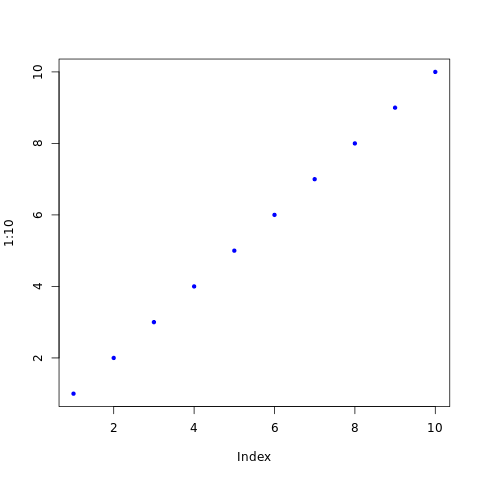

In [39]:
%%R

par(cex = 1)
plot(1:10, col = 'blue', pch = 20)

Vamos mostrar os graficos de diagnostico do modelo anterior

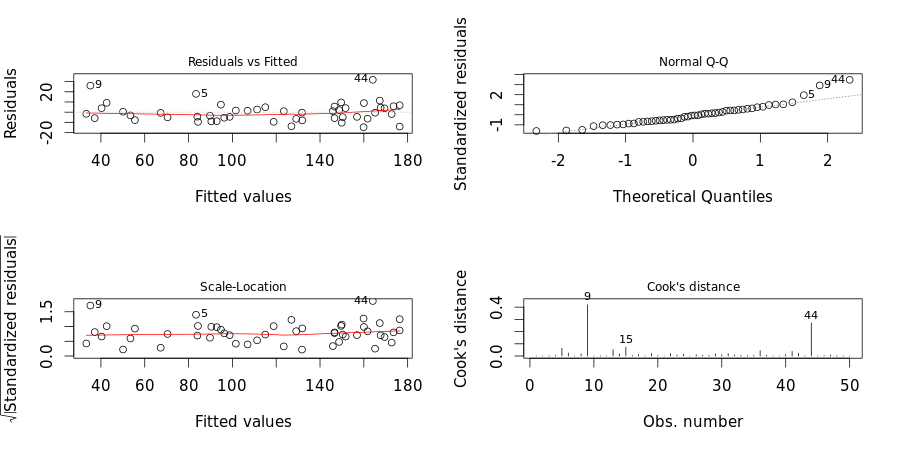

In [44]:
%%R -w 900 -h 450

par(mfrow = c(2, 2), cex = 1.25)

plot(fit, which = 1:4)

Generate a scatter plot with superimposed linear regression fit (and confidence intervals).

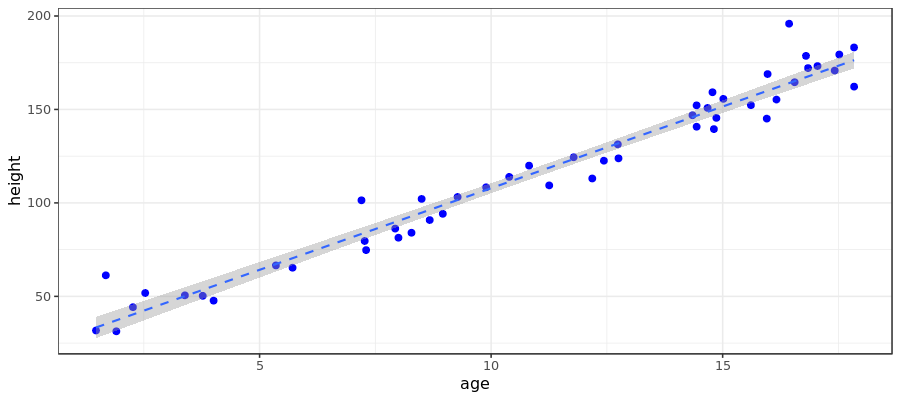

In [47]:
%%R -w 900 -h 400 -i growing

library(ggplot2)

ggplot(growing, aes(x = age, y = height)) +
    geom_point(size = 3, color = "blue") +
    geom_smooth(method = "lm", lty = "dashed") +
    theme_bw(base_size = 16)